<a href="https://colab.research.google.com/github/rtrochepy/machine_learning/blob/main/test_predictive_ml_001b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('./sample_data/california_housing_train.csv')
df_test = pd.read_csv('./sample_data/california_housing_test.csv')

In [3]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
print(df_train.shape)
print(df_test.shape)

(17000, 9)
(3000, 9)


In [6]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [7]:
df_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [9]:
def nullcolumns(df):
    null_perc = df.isnull().mean()*100
    print(df.columns[null_perc > 60],'\n')
    df = df[df.columns[null_perc <= 60]]
    return df

df_train = nullcolumns(df_train)
df_test = nullcolumns(df_test)

print('Cantidad de columnas restantes en train',df_train.shape[1],'\n')
print('Cantidad de columnas restantes en test',df_test.shape[1])

Index([], dtype='object') 

Index([], dtype='object') 

Cantidad de columnas restantes en train 9 

Cantidad de columnas restantes en test 9


In [10]:
def duplicados(df):
    df.drop_duplicates(inplace=True)
    return df

df_train = duplicados(df_train)
df_test = duplicados(df_test)

print('Cantidad de filas restantes en train',df_train.shape[0],'\n')
print('Cantidad de filas restantes en test',df_test.shape[0])

Cantidad de filas restantes en train 17000 

Cantidad de filas restantes en test 3000


In [15]:
def tipovariable(df):
    numericas = df.select_dtypes(include=np.number)
    return numericas

df_train_num = tipovariable(df_train)
df_test_num = tipovariable(df_test)

print('Cantidad respectiva de variables numéricas',len(df_train_num.columns))

Cantidad respectiva de variables numéricas 9


In [17]:
def detectar_outliers_num(df):

    riq = pd.DataFrame(index=df.columns)
    indices = []
    for col in df.columns:
        riq.loc[col,'primer_cuartil'] = np.percentile(df[col],25)
        riq.loc[col,'tercer_cuartil'] = np.percentile(df[col],75)
        riq.loc[col,'iqr'] = stats.iqr(df[col])
        lim_sup = riq.loc[col,'tercer_cuartil']+riq.loc[col,'iqr']*1.5
        lim_inf = riq.loc[col,'primer_cuartil']-riq.loc[col,'iqr']*1.5
        riq.loc[col,'outliers_sup'] = len(df[df[col]>lim_sup])
        riq.loc[col,'outliers_inf'] = len(df[df[col]<lim_inf])
#        indices += list(df[(df[col]>lim_sup) | (df[col]<lim_inf)].index)
        for i in df.index:
            if  df.loc[i,col] > lim_sup:
                df.loc[i,col] = lim_sup
            elif df.loc[i,col] < lim_inf:
                  df.loc[i,col] = lim_inf
#    df.drop(indices,inplace=True)
    return df, riq

df_train_num, informacion_train = detectar_outliers_num(df_train_num)
df_test_num, informacion_test = detectar_outliers_num(df_test_num)

print('La información sobre la cantidad de outliers la podemos ver en la tabla:','\n','\n', informacion_train,'\n')
# print('La cantidad de filas que quedaron en el dataframe:','\n','\n',df_train_num.shape[0])

La información sobre la cantidad de outliers la podemos ver en la tabla: 
 
                     primer_cuartil  tercer_cuartil            iqr  \
longitude              -121.790000        -118.000       3.790000   
latitude                 33.930000          37.720       3.790000   
housing_median_age       18.000000          37.000      19.000000   
total_rooms            1462.000000        3151.250    1689.250000   
total_bedrooms          297.000000         648.250     351.250000   
population              790.000000        1721.000     931.000000   
households              282.000000         605.250     323.250000   
median_income             2.566375           4.767       2.200625   
median_house_value   119400.000000      265000.000  145600.000000   

                    outliers_sup  outliers_inf  
longitude                    0.0           0.0  
latitude                     0.0           0.0  
housing_median_age           0.0           0.0  
total_rooms               1076.0    

In [18]:
lin = np.linspace(0,len(df_train_num.columns),math.floor(len(df_train_num.columns)/6))
for i in range(len(lin)-1):
    columns = df_train_num.columns[int(lin[i]):int(lin[i+1])]
    sns.pairplot(df_train_num[columns])
plt.show()

In [19]:
target = 'median_house_value'
X = pd.concat([df_train_num], axis=1)
y = df_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Models

Linear Regression

We will start with a linear regression. First, we define the model, train it using the "fit" function and the training set, and then predict the target variable on the test subset. By comparing the prediction with the actual values of y_test, we can determine the model's accuracy using two different metrics. The first metric is R², where the model is more accurate the closer R² is to one. We also calculate the mean absolute error, which we divide by the mean of the actual values to convert it into a mean relative error.

In [20]:
# Imputar valores faltantes con la media de cada característica
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

# Hacer predicciones
LR_pred = LR.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, LR_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :", r2_score(y_test, LR_pred))
print('Mean relative error :', mean_absolute_error(y_test, LR_pred) / y_test.mean())

Mean Squared Error: 8433098.49425311
R^2 : 0.9993659589500584
Mean relative error : 0.008591198288726247


Decision Tree

The accuracy of the linear regression is not very good, possibly because the structure of the relationships between the data is not approximately linear. Let's implement a decision tree:

In [21]:
dct = tree.DecisionTreeRegressor()
dct = dct.fit(X_train, y_train)
dct_pred = dct.predict((X_test))

mse = mean_squared_error(y_test, dct_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, dct_pred))
print('Mean relative error :',mean_absolute_error(y_test, dct_pred)/y_test.mean())

Mean Squared Error: 617956.0078431373
R^2 : 0.999953539084561
Mean relative error : 0.0004260639207709405


Random Forest

The accuracy of the decision trees wasn't very good in this case either. Let's try a couple of ensemble methods based on trees to see if we can improve it.

In [22]:
RF = RandomForestRegressor().fit(X_train,y_train)
RF_pred =  RF.predict(X_test)

mse = mean_squared_error(y_test, RF_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, RF_pred))
print('Mean relative error :',mean_absolute_error(y_test, RF_pred)/y_test.mean())

Mean Squared Error: 337733.239123137
R^2 : 0.9999746075849013
Mean relative error : 0.0004250652901371925


Gradient Boosting

In [23]:
XGB = GradientBoostingRegressor().fit(X_train,y_train)
XGB_pred =  XGB.predict(X_test)
print("R^2 :",r2_score(y_test, XGB_pred))
print('Mean relative error :',mean_absolute_error(y_test, XGB_pred)/y_test.mean())

R^2 : 0.9999223496750733
Mean relative error : 0.0032941100588306576


Gradient Boosting (XGBoost)

"Gradient Boosting creates a series of decision trees where each tree attempts to correct the errors of the previous tree. It is very effective for predictive models."

In [24]:
import xgboost as xgb

# Crear y entrenar el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
# Hacer predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# print("R^2 :",r2_score(y_test, y_pred))
# print('Mean relative error :',mean_absolute_error(y_test, y_pred)/y_test.mean())

In [25]:
X_train = X
y_train = df_train[target]

X_test = pd.concat([df_test_num], axis=1)

In [26]:
RF = RandomForestRegressor().fit(X_train,y_train)
RF_prediction =  RF.predict(X_test)

In [27]:
XGB = GradientBoostingRegressor().fit(X_train,y_train)
XGB_prediction =  XGB.predict(X_test)

In [28]:
xgb_model.fit(X_train, y_train)
# Hacer predicciones
xgb_prediction = xgb_model.predict(X_test)

In [29]:
print("R^2 :",r2_score(XGB_prediction, RF_prediction))
print('Mean relative error :',mean_absolute_error(XGB_prediction, RF_prediction)/XGB_prediction.mean())

print("R^2 xgb:",r2_score(xgb_prediction, RF_prediction))
print('Mean relative error :',mean_absolute_error(xgb_prediction, RF_prediction)/xgb_prediction.mean())

print("R^2 xgb:",r2_score(XGB_prediction, xgb_prediction))
print('Mean relative error :',mean_absolute_error(XGB_prediction, xgb_prediction)/XGB_prediction.mean())

R^2 : 0.9999309582699675
Mean relative error : 0.0033886294080655295
R^2 xgb: 0.9999286687880886
Mean relative error : 0.0025889056636441404
R^2 xgb: 0.9998732567690501
Mean relative error : 0.004183430104641036


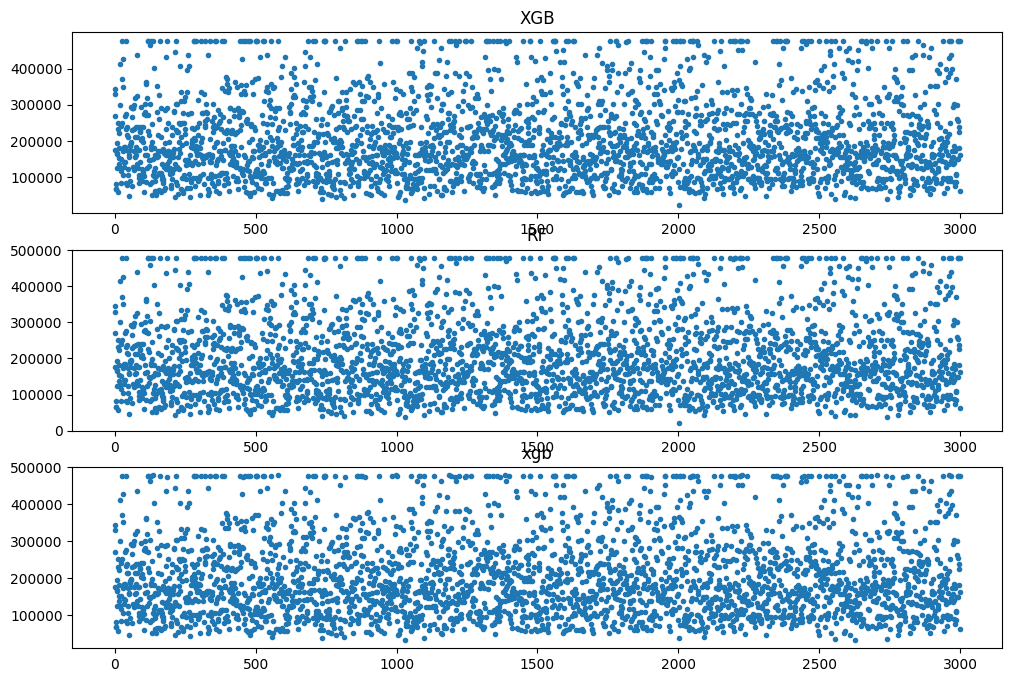

In [30]:
fig,ax = plt.subplots(3,1,figsize=(12,8))
ax[0].plot(XGB_prediction,'.')
ax[0].set_title('XGB')
ax[1].plot(RF_prediction,'.')
ax[1].set_title('RF')
ax[2].plot(xgb_prediction,'.')
ax[2].set_title('xgb')
plt.show()

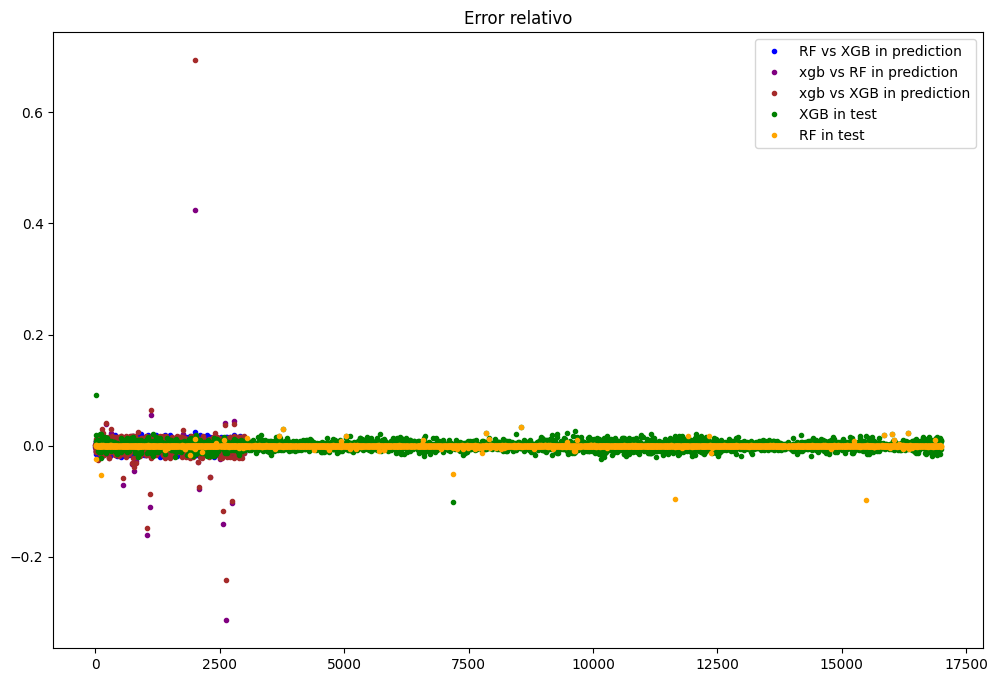

In [31]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
# Usar diferentes colores para cada conjunto de datos
rel_error = (XGB_prediction - RF_prediction) / XGB_prediction
ax.plot(rel_error, '.', color='blue', label='RF vs XGB in prediction')

rel_error = (xgb_prediction - RF_prediction) / xgb_prediction
ax.plot(rel_error, '.', color='purple', label='xgb vs RF in prediction')

rel_error = (xgb_prediction - XGB_prediction) / XGB_prediction
ax.plot(rel_error, '.', color='brown', label='xgb vs XGB in prediction')

rel_error = (XGB_pred - y_test) / y_test
ax.plot(rel_error, '.', color='green', label='XGB in test')

rel_error = (RF_pred - y_test) / y_test
ax.plot(rel_error, '.', color='orange', label='RF in test')

# rel_error = (y_pred - y_test) / y_test
# ax.plot(rel_error, '.', color='red', label='xgb in test')

# Título y leyenda
plt.title('Error relativo')
plt.legend()
plt.show()

In [32]:
RF_importance = RF.feature_importances_
RF_importance = pd.DataFrame({'Variable':X_train.columns,'Importance':RF_importance})
RF_importance

,Variable,Importance
0,longitude,0.000004
1,latitude,0.000003
2,housing_median_age,0.000003
3,total_rooms,0.000003
4,total_bedrooms,0.000003
5,population,0.000004
6,households,0.000003
7,median_income,0.000005
8,median_house_value,0.999973


In [33]:
med = y.median()
for i in y.index:
    if y[i] > med:
        y[i] = 1
    else:
        y[i] = 0

In [34]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

log = LogisticRegression()
log = log.fit(X_train,y_train)
log_pred = log.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, log_pred))

Accuracy: 0.9850980392156863


In [35]:
log_coef = log.coef_.flatten()
log_coef = pd.DataFrame({'Variable':X.columns,'Log_coef':log_coef})
log_coef = log_coef.sort_values(by=['Log_coef'],ascending=False)
log_coef

,Variable,Log_coef
0,longitude,0.526613
6,households,0.003424
8,median_house_value,0.000407
3,total_rooms,-0.000297
5,population,-0.000585
4,total_bedrooms,-0.002624
7,median_income,-0.008560
2,housing_median_age,-0.121686
1,latitude,-0.160316


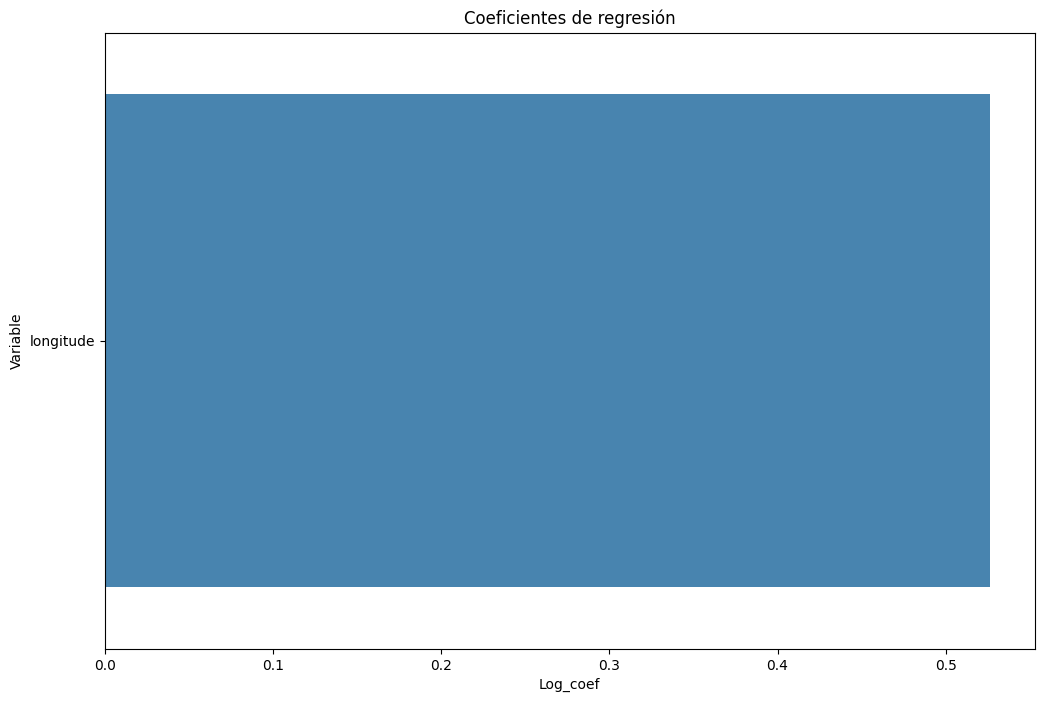

In [36]:
log_coef_plot = log_coef[abs(log_coef['Log_coef'])>0.4]
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(y=log_coef_plot['Variable'],x=log_coef_plot['Log_coef'],data=log_coef_plot,palette="Blues_d")
plt.title('Coeficientes de regresión')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (3400, 9)
y_test shape: (3400,)


In [40]:
print(f'y_pred shape: {y_pred.shape}')

y_pred shape: (5100,)


In [41]:
import tensorflow as tf
from tensorflow.keras import layers

# Definir el modelo de red neuronal
nn_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Hacer predicciones
y_pred = nn_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print("R^2 :",r2_score(y_test, y_pred))
print('Mean relative error :',mean_absolute_error(y_test, y_pred)/y_test.mean())

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 2602.8966467142695
R^2 : -10417.565944527878
Mean relative error : 87.9084584450503
